In [4]:
from matplotlib import pyplot as plt
import numpy as np
import numpy.matlib as matlib
from matplotlib.colors import LogNorm
import itertools
import random
import math

In [15]:
def SamplePatterns():
    w = []
    w.append([-1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1, 1, 1, 1,-1,-1,-1,
              -1, 1, 1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
             ])
    w.append([-1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
               1, 1, 1, 1, 1, 1, 1, 1,
               1, 1, 1, 1, 1, 1, 1, 1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
             ])
    w.append([-1,-1,-1,-1,-1,-1,-1,-1,
              -1,-1,-1,-1,-1,-1,-1,-1,
              -1,-1,-1,-1,-1,-1,-1,-1,
               1, 1, 1, 1, 1, 1, 1, 1,
               1, 1, 1, 1, 1, 1, 1, 1,
              -1,-1,-1,-1,-1,-1,-1,-1,
              -1,-1,-1,-1,-1,-1,-1,-1,
              -1,-1,-1,-1,-1,-1,-1,-1,
             ])
    w.append([ 1,-1,-1,-1,-1,-1,-1, 1,
              -1, 1,-1,-1,-1,-1, 1,-1,
              -1,-1, 1,-1,-1, 1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1,-1, 1, 1,-1,-1,-1,
              -1,-1, 1,-1,-1, 1,-1,-1,
              -1, 1,-1,-1,-1,-1, 1,-1,
               1,-1,-1,-1,-1,-1,-1, 1,
             ])
    return np.array(w)

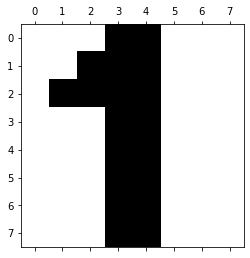

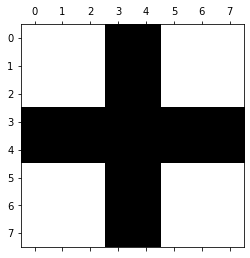

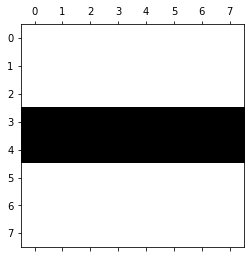

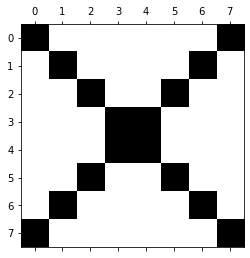

In [17]:
sampleShapes = SamplePatterns()

for i in range (4):
    plt.matshow(np.reshape(sampleShapes[i],(-1,8)),cmap=plt.cm.binary)

In [18]:
def noise(image):
    noisy = image
    size = image.shape
    mean = 0
    sigma = 3
    gauss = np.random.normal(mean, sigma , size)
    gauss = np.round_(gauss)
    for i, num in enumerate (noisy):
        if num*-1== gauss[i]:
            noisy[i]=gauss[i]
    return noisy

In [19]:
def hebb_weight(patterns):
    row , col = np.shape(patterns)
    weight = np.multiply(np.matmul(patterns.T,patterns),(np.ones(col)-np.identity(col)))
    return weight

In [20]:
def discrete(x):
    if x>=0: return 1
    else:return -1

In [21]:
def hopfield(noisy,patterns , n_iter):
    weight = np.array(hebb_weight(patterns))
    col, row = np.shape(weight)
    
    output = np.zeros(col)
    temp = noisy
    
    for i in range (1, n_iter+1):
        plt.matshow(np.reshape(temp,(-1,8)), cmap=plt.cm.binary)
        for k in np.random.permutation(col):
            if (weight[k,].any()!=0.0):
                temp[k] = discrete (np.matmul(weight[k,],temp))
        if (temp==output).all():
            break
        output = temp
    return output, i

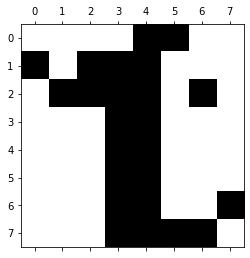

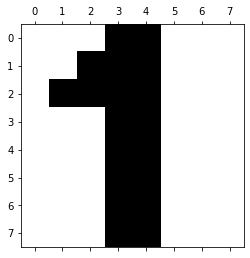

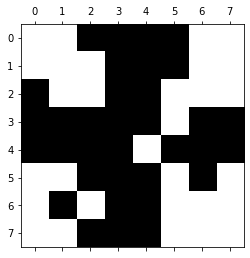

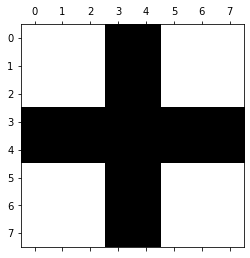

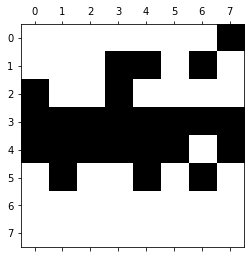

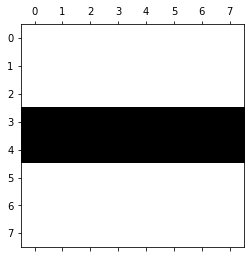

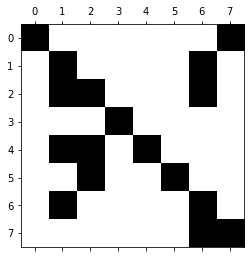

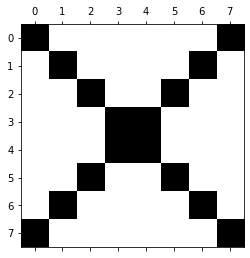

In [24]:
toNoise = SamplePatterns()
noisy = [noise(wi) for wi in toNoise]
tonetwork=SamplePatterns()
toNetwork=[noise(wi) for wi in tonetwork]
patterns = SamplePatterns()

for i in range (4):
    output, niter = hopfield(toNetwork[i],patterns , 10)
    
plt.show()